dataset that contains information about placements of job aspirants after they have completed their MBA degree.

In [320]:
import pandas as pd
import seaborn as sns
import numpy as np
import ppscore as pps

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.random.seed(42)

In [321]:
#function to plot heatmap of PPS
def heatmap(df):
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax

In [322]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [324]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

there are some NaN values in Salary column, we will be removing them. Also, the workex and job_status columns have text values, so we convert them to numerical binary values for easy handling

In [325]:
df['workex'].replace({'No':0,'Yes':1},inplace=True)

In [326]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [327]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])

In [328]:
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0


In [329]:
#df.dropna('salary',inplace=True)


Find the relationship between the MBA_Grade and Workex columns. The ppscore tells us about the relationship. The low value suggests that the relationship is not strong.

In [330]:
pps.score(df,'mba_p','workex')

{'x': 'mba_p',
 'y': 'workex',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.34418604651162793,
 'model_score': 0.4205974842767296,
 'model': DecisionTreeRegressor()}

In [331]:
matrix = pps.matrix(df)
matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,sl_no,sl_no,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,sl_no,gender,0.058632,classification,True,weighted F1,0.534884,0.562154,DecisionTreeClassifier()
2,sl_no,ssc_p,0.000000,regression,True,mean absolute error,8.868326,13.168021,DecisionTreeRegressor()
3,sl_no,ssc_b,0.068387,classification,True,weighted F1,0.544186,0.575358,DecisionTreeClassifier()
4,sl_no,hsc_p,0.000000,regression,True,mean absolute error,8.270465,13.350933,DecisionTreeRegressor()
5,sl_no,hsc_b,0.000000,classification,True,weighted F1,0.581395,0.538757,DecisionTreeClassifier()
6,sl_no,hsc_s,0.000000,classification,True,weighted F1,0.483721,0.391055,DecisionTreeClassifier()
7,sl_no,degree_p,0.000000,regression,True,mean absolute error,5.718093,8.292089,DecisionTreeRegressor()
8,sl_no,degree_t,0.000000,classification,True,weighted F1,0.567442,0.466482,DecisionTreeClassifier()
9,sl_no,workex,0.000000,regression,True,mean absolute error,0.344186,0.474581,DecisionTreeRegressor()


In [332]:
# drop sl no 
df.drop('sl_no',axis=1,inplace=True)

In [333]:
df.describe()

,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,0.344186,72.100558,62.278186,0.688372,288655.405405
std,10.827205,10.897509,7.358743,0.476211,13.275956,5.833385,0.464240,93457.452420
min,40.890000,37.000000,50.000000,0.000000,50.000000,51.210000,0.000000,200000.000000
25%,60.600000,60.900000,61.000000,0.000000,60.000000,57.945000,0.000000,240000.000000
50%,67.000000,65.000000,66.000000,0.000000,71.000000,62.000000,1.000000,265000.000000
75%,75.700000,73.000000,72.000000,1.000000,83.500000,66.255000,1.000000,300000.000000
max,89.400000,97.700000,91.000000,1.000000,98.000000,77.890000,1.000000,940000.000000


### DATA PREPROCESSING AND EDA

In [334]:
# DIVIDE THE date into train and test we will do all prepricessing steps on train
# and repeat the same on test data later 
from sklearn.model_selection import train_test_split
X = df.drop(['status','salary'],axis=1)
y = df['status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,shuffle=True)

In [335]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()

In [336]:
X_train.shape,y_train.shape

((161, 13), (161,))

In [337]:
X_test.shape,y_test.shape


((54, 13), (54,))

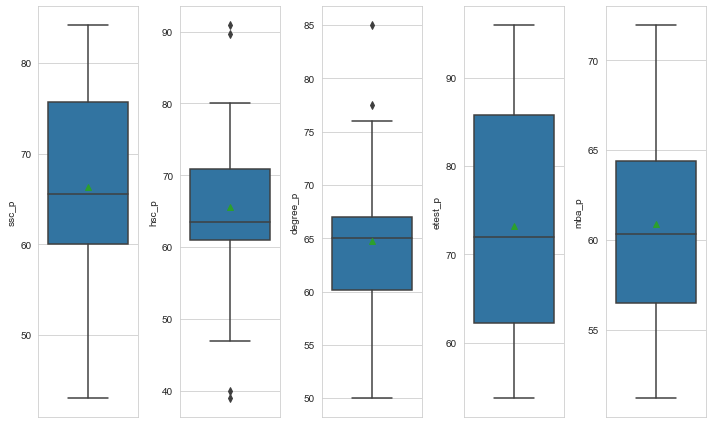

In [338]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
col_to_hist =['ssc_p','hsc_p','degree_p','etest_p','mba_p']
i=1
plt.figure(figsize=(10,6))
for col in col_to_hist:
    plt.subplot(1,5,i)
    sns.boxplot(y=X_test[col],showmeans=True)
    i+=1
    plt.tight_layout()
    

There are only two extreme values shown in box plot . One is for hsc_p(higher extreme) and other is degree_p(lower extreme). 

In [339]:
X_train[X_train['hsc_p']> 95]

,index,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
42,24,M,76.5,Others,97.7,Others,Science,78.86,Sci&Tech,0,97.4,Mkt&Fin,74.01
134,177,F,73.0,Central,97.0,Others,Commerce,79.00,Comm&Mgmt,1,89.0,Mkt&Fin,70.81


In [340]:
X_train[X_train['degree_p'] <55]

,index,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
7,3,M,56.00,Central,52.00,Central,Science,52.0,Sci&Tech,0,66.00,Mkt&HR,59.43
16,52,F,40.89,Others,45.83,Others,Commerce,53.0,Comm&Mgmt,0,71.20,Mkt&HR,65.49
25,106,M,61.08,Others,50.00,Others,Science,54.0,Sci&Tech,0,71.00,Mkt&Fin,65.69
30,25,F,52.58,Others,54.60,Central,Commerce,50.2,Comm&Mgmt,1,76.00,Mkt&Fin,65.33
39,214,M,62.00,Central,58.00,Others,Science,53.0,Comm&Mgmt,0,89.00,Mkt&HR,60.22
47,34,M,62.00,Others,51.00,Others,Science,52.0,Others,0,68.44,Mkt&HR,62.77
65,49,F,50.00,Others,37.00,Others,Arts,52.0,Others,0,65.00,Mkt&HR,56.11
98,91,M,52.00,Central,57.00,Central,Commerce,50.8,Comm&Mgmt,0,67.00,Mkt&HR,62.79


In [341]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0


In [342]:
X_train.columns

Index(['index', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'], dtype='object')

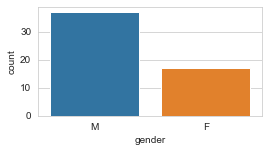

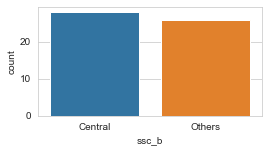

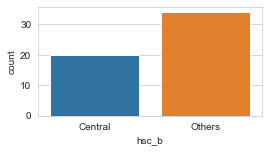

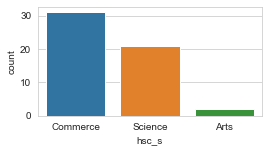

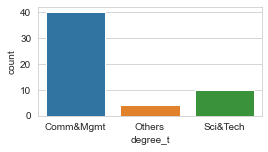

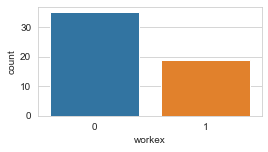

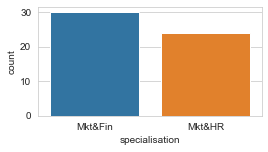

In [343]:
col_to_bar = ['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex','specialisation']
i=1

for col in col_to_bar:
    plt.figure(figsize=(4,2))
    sns.countplot(x=X_test[col])
    plt.show()


In [344]:
# using one hot encoding for all cat columns
X_train = pd.get_dummies(X_train)
#X_train = pd.concat([X_train,ohe_df],axis=1)

In [345]:
X_train.head(2)

,index,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,30,64.0,73.5,73.0,0,52.0,56.70,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1,118,76.0,80.0,78.0,1,97.0,70.48,0,1,1,0,1,0,0,0,1,0,0,1,0,1


In [346]:
X_train.drop('index',axis=1,inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ssc_p                   161 non-null    float64
 1   hsc_p                   161 non-null    float64
 2   degree_p                161 non-null    float64
 3   workex                  161 non-null    int64  
 4   etest_p                 161 non-null    float64
 5   mba_p                   161 non-null    float64
 6   gender_F                161 non-null    uint8  
 7   gender_M                161 non-null    uint8  
 8   ssc_b_Central           161 non-null    uint8  
 9   ssc_b_Others            161 non-null    uint8  
 10  hsc_b_Central           161 non-null    uint8  
 11  hsc_b_Others            161 non-null    uint8  
 12  hsc_s_Arts              161 non-null    uint8  
 13  hsc_s_Commerce          161 non-null    uint8  
 14  hsc_s_Science           161 non-null    ui

In [363]:
# fit a baseline model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1, max_depth=5, random_state=1)
forest.fit(X_train,y_train)
forest.score(X_train,y_train)

0.9627329192546584

In [364]:
# preprocess test data
X_test = pd.get_dummies(X_test)
X_test.drop('index',axis=1,inplace=True)

In [366]:
from sklearn import metrics
y_pred = forest.predict(X_test)
metrics.accuracy_score(y_test,y_pred)


0.8888888888888888

# build an improved model

In [360]:
# use Boruta to get best features
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1, max_depth=5, random_state=1)
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=0, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=56,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x2273A4B2A40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2273A4B2A40)

In [361]:
# Let's visualise it better in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_select.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,ssc_p,1
1,hsc_p,1
2,degree_p,1
5,mba_p,1
4,etest_p,2
3,workex,3
18,specialisation_Mkt&Fin,4
19,specialisation_Mkt&HR,5
7,gender_M,6
6,gender_F,7


In [367]:
features = ['ssc_p','hsc_p','degree_p','mba_p']
X_train = X_train[features]
X_test = X_test[features]

In [368]:
forest.fit(X_train,y_train)
forest.score(X_train,y_train)

0.9875776397515528

In [369]:
y_pred = forest.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.8703703703703703

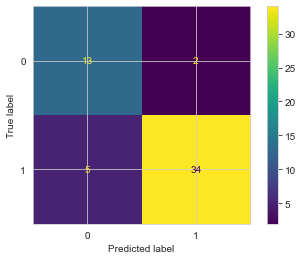

In [371]:
metrics.plot_confusion_matrix(forest,X_test,y_test)

In [373]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.94      0.87      0.91        39

    accuracy                           0.87        54
   macro avg       0.83      0.87      0.85        54
weighted avg       0.88      0.87      0.87        54



### ADDRESSING CLASS IMBALANCE

In [392]:
X = df.drop(['status','salary'],axis=1)
y = df['status']

In [393]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({1: 148, 0: 67})
Resample dataset shape Counter({1: 148, 0: 148})


In [399]:
x_ros = pd.DataFrame.from_records(x_ros)
x_ros.columns = X.columns
y_ros = pd.Series(y_ros,name='status')

In [400]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42, stratify=y_ros)

In [401]:
features = ['ssc_p','hsc_p','degree_p','mba_p']
X_train = X_train[features]
X_test = X_test[features]

In [402]:
forest.fit(X_train,y_train)
forest.score(X_train,y_train)

0.9703389830508474

In [403]:
y_pred = forest.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

In [404]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.87      0.93        30

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



Addressing the class imbalance has led improvement in f1 score. Further we can also use hyperparameter tuning and iterate any improvement in model metrics